ダミーデータの作成
機械学習に関するプログラムの実験を行う上で、<br>実データではないランダムなデータ（ダミーデータ）が欲しいということがあります。<br>正規分布に従う乱数によるダミーデータの作成を通じてNumPyの使い方になれていきましょう。<br>散布図で描くと次のようになるデータを作っていきます。


【問題1】乱数の作成
 平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。
 [1.0 0.8] <br>[0,8 1.0]
 多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。
 作成したndarrayのshapeは(500, 2)になります。
 《シード値について》
 実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。<br>今回シード値は0を使うことにします。
 ➡︎　np.random.seed(0)



In [1]:
import numpy as np

mean = (-3,0) # 生成したい正規分布の平均値ベクトル
cov = [[1,0.8],[0.8,1]] # 生成したい正規分布の共分散行列
size = 500 # 生成する乱数の数
np.random.seed(0) # 実行ごとに値が変わらないよう、乱数のシード値を固定
ex_ndarray = np.random.multivariate_normal(mean,cov,size)

print("shape = {}".format(ex_ndarray.shape))


shape = (500, 2)


【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。散布図はmatplotlibのplt.scatter()を使うことで描けます。


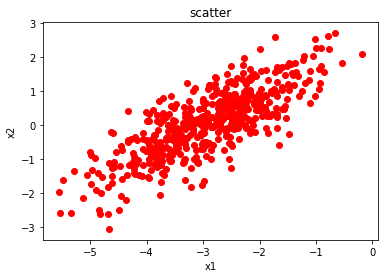

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
x1 = ex_ndarray[:,0]# 生成した配列の１列目
x2 = ex_ndarray[:,1]# 生成した配列の２列目
plt.scatter(x1,x2, c = "red") # 散布図を作成
plt.title("scatter")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。ヒストグラムはplt.hist()を使うことで描けます。<br>各次元ごとに作成し、2つのヒストグラムとしてください。<br>それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。




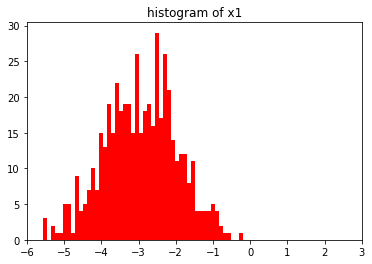

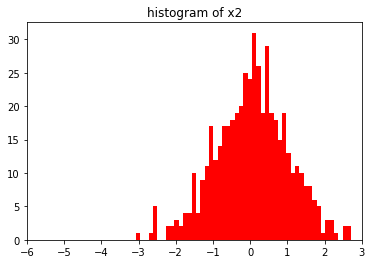

In [3]:
plt.hist(x1,bins=50,color = "red") # ビン (表示する棒) の数。階級数。(デフォルト値: 10)
plt.title("histogram of x1")
plt.xlim(-6,3)
plt.show()

plt.hist(x2,bins=50,color = "red")
plt.title("histogram of x2")
plt.xlim(-6,3)
plt.show()

【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。
[1.0 0.8]<br>[0.8 1.0]
そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。<br>凡例として問題1のものは0、問題2のものは1を表示してください。


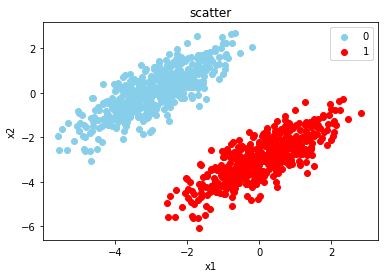

In [4]:
mean2 = (0,-3)
np.random.seed(0)
ex_ndarray2 = np.random.multivariate_normal(mean2,cov,size)
x3 = ex_ndarray2[:,0]
x4 = ex_ndarray2[:,1]

plt.scatter(x1,x2,label = 0,color = "skyblue")#平均が(-3, 0)
plt.scatter(x3,x4,label = 1,color = "red")#平均が(0, -3)
plt.title("scatter")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="upper right")# 凡例を配置する(loc = で場所指定)

plt.show()

【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。<br>問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。<br>結合は np.concatenate()やnp.vstack()を使うことで行えます。


〜np.concatenate()〜 ※配列どうしを結合

In [5]:
concatenate_ndarray = np.concatenate([ex_ndarray,ex_ndarray2],axis=0)
print(concatenate_ndarray.shape)

(1000, 2)


〜np.vstack()〜 ※縦方向に配列を結合

In [6]:
vstack_ndarray = np.vstack((ex_ndarray,ex_ndarray2))
print(vstack_ndarray.shape)

(1000, 2)


【問題6】ラベル付け
 ひとまとめになった1000個のデータそれぞれに対して、<br>問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。<br>問題1のものには0、問題4のものには1を対応させます。<br>0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。<br>機械学習に使用するデータセットはこのような形になっていることが多いです。


In [7]:
zero_ndarray = np.zeros(500) #１列目の配列→０
one_ndarray = np.ones(500)#２列目の配列→１
zero_one_ndarray = np.concatenate([zero_ndarray,one_ndarray])#１列目と２列目を結合
reshp_ndarray = zero_one_ndarray.reshape(1000,1)#1000行１列に変形

label_ndarray = np.hstack((concatenate_ndarray,reshp_ndarray))# 問５で結合した行列にnp.hstackで横方向に結合して、0or1のラベルをつける
print(label_ndarray.shape)
print(label_ndarray[:3,:])
print(label_ndarray[-3:,:])

(1000, 3)
[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]]
[[-0.40484501 -3.14372258  1.        ]
 [ 0.1584315  -2.78199606  1.        ]
 [ 1.20196495 -2.02452628  1.        ]]


In [8]:
conda install -c conda-forge nodejs

Solving environment: \ 
  - https://repo.continuum.io/pkgs/main/osx-64/conda-build-3.4.1-py36_0.tar.bz2/osx-64::conda-build-3.4.1-py36_0, https://repo.continuum.io/pkgs/main/osx-64/cycler-0.10.0-py36hfc81398_0.tar.bz2/osx-64::cycler-0.10.0-py36hfc81398_0, https://repo.continuum.io/pkgs/main/osx-64/icu-58.2-h4b95b61_1.tar.bz2/osx-64::icu-58.2-h4b95b61_1, https://repo.continuum.io/pkgs/main/osx-64/osx-64::conda-package-handling-1.6.0-py36h1de35cc_0
  - defaults/osx-64::conda-package-handling-1.6.0-py36h1de35cc_0, https://repo.continuum.io/pkgs/main/osx-64/conda-build-3.4.1-py36_0.tar.bz2/osx-64::conda-build-3.4.1-py36_0, https://repo.continuum.io/pkgs/main/osx-64/cycler-0.10.0-py36hfc81398_0.tar.bz2/osx-64::cycler-0.10.0-py36hfc81398_0, https://repo.continuum.io/pkgs/main/osx-64/icu-58.2-h4b95b61_1.tar.bz2/osx-64::icu-58.2-h4b95b61_1
  - defaults/osx-64::conda-build-3.4.1-py36_0, https://repo.continuum.io/pkgs/main/osx-64/cycler-0.10.0-py36hfc81398_0.tar.bz2/osx-64::cycler-0.10.0-py36hfc